In [1]:
#Cargo librerias que voy a utilizar
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from matplotlib import gridspec
from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif')

In [2]:
#ploteo genérico para un gráfico
def ploteo_1_graph(nombre, theta2, Y, titulo, xlabel, ylabel):
    plt.plot(np.rad2deg(theta2), Y)
    plt.title(titulo, fontsize=14)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.tick_params(labelsize=14)
    plt.savefig(nombre)
    plt.show()

In [3]:
#ploteo genérico para dos gráficos
def ploteo_2_graph(nombre, theta2, Y1, Y2, titulo, label1, label2, xlabel1, ylabel1, xlabel2, ylabel2):
    fig=plt.figure()
    gs = gridspec.GridSpec(2, 1)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[1, 0])
    fig.suptitle(titulo, fontsize=16)
    ax1.plot(np.rad2deg(theta2), Y1, color='red', label=label1)
    ax2.plot(np.rad2deg(theta2), Y2, label=label2)
    ax1.set_xlabel(xlabel1, fontsize=14)
    ax1.set_ylabel(ylabel1, fontsize=14)
    ax2.set_xlabel(xlabel2, fontsize=14)
    ax2.set_ylabel(ylabel2, fontsize=14)
    ax1.legend(fontsize=14)
    ax2.legend(fontsize=14)
    ax1.tick_params(labelsize=14)
    ax2.tick_params(labelsize=14)
    plt.savefig(nombre)
    plt.show()

In [4]:
#ploteo genérico para 3 gráficos
def ploteo_3_graph(nombre, theta2, Y1, Y2, Y3, titulo, label1, label2, label3, xlabel1, ylabel1, xlabel2, ylabel2, xlabel3, ylabel3):
    fig=plt.figure()
    fig=plt.figure(figsize=(15, 4.2))
    gs = gridspec.GridSpec(2, 2)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[1, 0])
    ax3 = fig.add_subplot(gs[:, 1])
    fig.suptitle(titulo, fontsize=16)
    ax1.plot(np.rad2deg(theta2), Y1, color='red', label=label1)
    ax2.plot(np.rad2deg(theta2), Y2, label=label2)
    ax3.plot(np.rad2deg(theta2), Y3, color='orange', label=label3)
    ax1.set_xlabel(xlabel1, fontsize=14)
    ax1.set_ylabel(ylabel1, fontsize=14)
    ax2.set_xlabel(xlabel2, fontsize=14)
    ax2.set_ylabel(ylabel2, fontsize=14)
    ax3.set_xlabel(xlabel3, fontsize=14)
    ax3.set_ylabel(ylabel3, fontsize=14)
    ax1.legend(fontsize=14)
    ax2.legend(fontsize=14)
    ax3.legend(fontsize=14)
    ax1.tick_params(labelsize=14)
    ax2.tick_params(labelsize=14)
    ax3.tick_params(labelsize=14)
    plt.savefig(nombre)
    plt.show()

In [5]:
#cargo datos de entrada, los .txt los obtuve en los tps anteriores
theta1=np.arctan(1200/1600)+np.pi/2 #ángulo entre los sistemas de coordenadas
theta2_lista=np.linspace(0, 2*np.pi, 10000) #creo el array theta2 para una vuelta completa de la manivela
n=len(theta2_lista) #define la cantidad de elementos que estoy tomando
d=2000/1000 #largo de eslabones 
a=350/1000
b=2000/1000
c=1280/1000
e=1980/1000 #distancia O4-CG4
delta=np.deg2rad(14) #ángulo entre el eslabón y O4-CG4
omega2=4*2*np.pi/60 #velocidad angular de entrada, la convierto de rpm a rad/s
alfa2=0 #no tiene aceleración angular (el eslabón 2)
l=[a, b, c, d] #lista con los largos de eslabones

In [6]:
#masas pesos e inercias
g=-9.807 #gravedad en m/s^2
P2=-2660 #pesos del eslabón 2 en newton
m2=P2/g #masa del eslabón 2
I2=1.33 #inercia del eslabón 2 en N m s^2
P3=-480 #peso eslabón 3
m3=P3/g #masa eslabón 3
I3=17 #inercia eslabón 3
P4=-12000 #peso eslabón 4
m4=P4/g #masa eslabón 4
I4=1210 #inercia eslabón 4
Fa=-13200 #fuerza de la barra en la carrera ascendente
Fd=-10300 #fuerza de la barra en la carrera descendente
i_min=7423 #desde i_max hasta i_min el punto P está en ascenso
i_max=2607 #por fuera está en descenso
F=[Fd for i in range(i_max)]
[F.append(Fa) for i in range(i_min-i_max)]
[F.append(Fd) for i in range(len(theta2_lista)-i_min)]
print('a')

a


In [7]:
O2_X=np.array([0]*n)/1000 #genero un array de ceros 
O2_Y=np.array([0]*n)/1000 #same
O4_X=np.array([2000*np.cos(theta1)]*n)/1000 #genero array con siempre la posicion de o4 que es constante
O4_Y=np.array([2000*np.sin(theta1)]*n)/1000 #same
A_X, A_Y=np.loadtxt('A.txt', unpack=1)/1000 #cargo A
B_X, B_Y=np.loadtxt('B.txt', unpack=1)/1000 #cargo B
CG2_X, CG2_Y=np.loadtxt('CG2.txt', unpack=1)/1000 #cargo CG2
CG3_X, CG3_Y=np.loadtxt('CG3.txt', unpack=1)/1000 #cargo CG3
CG4_X, CG4_Y=np.loadtxt('CG4.txt', unpack=1)/1000 #cargo CG4
alfa3=np.loadtxt('alfa3.txt') #cargo alfa3
alfa4=np.loadtxt('alfa4.txt') #cargo alfa 4
ACG2_X, ACG2_Y=np.loadtxt('ACG2.txt', unpack=1)/1000 #cargo aceleración CG2
ACG3_X, ACG3_Y=np.loadtxt('ACG3.txt', unpack=1)/1000 #cargo aceleración CG3
ACG4_X, ACG4_Y=np.loadtxt('ACG4.txt', unpack=1)/1000 #cargo aceleración CG4
print(ACG2_X)

[-0.05790168 -0.05790167 -0.05790163 ... -0.05790163 -0.05790167
 -0.05790168]


In [8]:
#armado de vectores pertinentes
R14_X=O4_X-CG4_X #Vectores desde el CG4 hacia los nodos O4 y B
R14_Y=O4_Y-CG4_Y
R34_X=B_X-CG4_X
R34_Y=B_Y-CG4_Y

R43_X=B_X-CG3_X #Vectores desde el CG3 hacia los nodos A y B
R43_Y=B_Y-CG3_Y
R23_X=A_X-CG3_X
R23_Y=A_Y-CG3_Y

R32_X=A_X-CG2_X #Vectores desde el CG2 hacia los nodos O2 y A
R32_Y=A_Y-CG2_Y
R12_X=O2_X-CG2_X
R12_Y=O2_Y-CG2_Y

Rf=-CG4_X-2.4

In [9]:
#armado de la matriz
fila1=np.array([1, 0, 1, 0, 0, 0, 0, 0, 0]).astype(float)
fila2=np.array([0, 1, 0, 1, 0, 0, 0, 0, 0]).astype(float)
fila3=np.array([[-R12_Y[i], R12_X[i], -R32_Y[i], R32_X[i], 0, 0, 0, 0, 1] for i in range(n)]).astype(float)

fila4=np.array([0, 0, -1, 0, 1, 0, 0, 0, 0]).astype(float)
fila5=np.array([0, 0, 0, -1, 0, 1, 0, 0, 0]).astype(float)
fila6=np.array([[0, 0, R23_Y[i], -R23_X[i], -R43_Y[i], R43_X[i], 0, 0, 0] for i in range(n)]).astype(float)

fila7=np.array([0, 0, 0, 0, -1, 0, 1, 0, 0]).astype(float)
fila8=np.array([0, 0, 0, 0, 0, -1, 0, 1, 0]).astype(float)
fila9=np.array([[0, 0, 0, 0, R34_Y[i], -R34_X[i], -R14_Y[i], R14_X[i],0] for i in range(n)]).astype(float)

matriz=np.array([[fila1, fila2, fila3[i], fila4, fila5, fila6[i], fila7, fila8, fila9[i]] for i in range(n)])

In [10]:
#armado de vector solucion
y1=m2*ACG2_X
y2=m2*ACG2_Y-P2
y3=I2*alfa2
y4=m3*ACG3_X
y5=m3*ACG3_Y-P3
y6=I3*alfa3
y7=m4*ACG4_X
y8=m4*ACG4_Y-P4-F
y9=I4*alfa4-Rf*F
vecsol=np.array([[y1[i], y2[i], y3, y4[i], y5[i], y6[i], y7[i], y8[i], y9[i]] for i in range(n)])

In [11]:
#resolucion del sistema y asignacion de resultados
sol=[np.linalg.solve(matriz[i],vecsol[i]) for i in range(n)]
F12_X=np.array([sol[i][0] for i in range(n)])
F12_Y=np.array([sol[i][1] for i in range(n)])
F12=np.sqrt(F12_X**2+F12_Y**2)
F32_X=np.array([sol[i][2] for i in range(n)])
F32_Y=np.array([sol[i][3] for i in range(n)])
F32=np.sqrt(F32_X**2+F32_Y**2)
F43_X=np.array([sol[i][4] for i in range(n)])
F43_Y=np.array([sol[i][5] for i in range(n)])
F43=np.sqrt(F43_X**2+F43_Y**2)
F14_X=np.array([sol[i][6] for i in range(n)])
F14_Y=np.array([sol[i][7] for i in range(n)])
F14=np.sqrt(F14_X**2+F14_Y**2)
T12=np.array([sol[i][8] for i in range(n)])

In [14]:
#potencia
Tmax=max(T12)
print(Tmax)
potencia=Tmax*omega2
print(potencia)

4173.147425125053
1748.043905749337


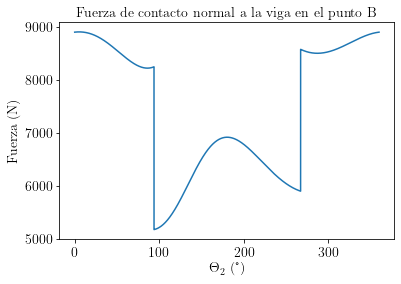

In [32]:
#punto de contacto
R_X=O4_X-B_X
R_Y=O4_Y-B_Y
R=np.array([np.transpose([R_X[i], R_Y[i]]) for i in range(len(R_X))])
phi=np.arcsin(350/1280)+np.pi/2
M=np.array([[np.cos(phi), np.sin(phi)],[-np.sin(phi), np.cos(phi)]])
R_rot=np.array([np.matmul(M,R[i]) for i in range(len(R))])
norma=np.sqrt(R_rot[0][0]**2+R_rot[0][1]**2)
R_rot=R_rot/norma
F34=np.array([[-F43_X[i], -F43_Y[i]] for i in range(len(F43_X))])
F_contacto=np.array([np.dot(F34[i], R_rot[i]) for i in range(len(F34))])
ploteo_1_graph('Fcontacto.png', theta2_lista, F_contacto, 'Fuerza de contacto normal a la viga en el punto B', '$\Theta_2$ (°)', 'Fuerza (N)')

<Figure size 432x288 with 0 Axes>

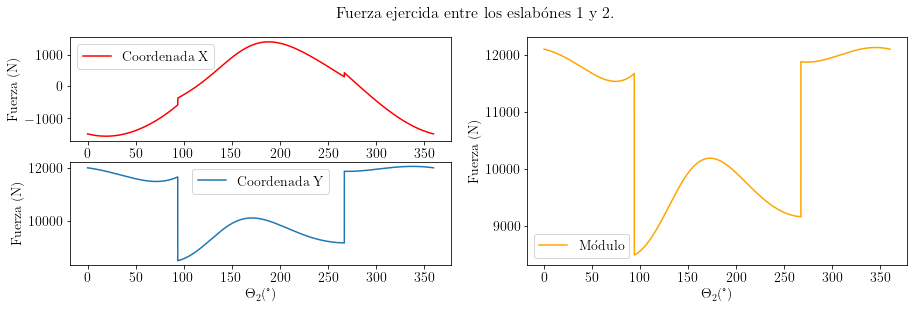

<Figure size 432x288 with 0 Axes>

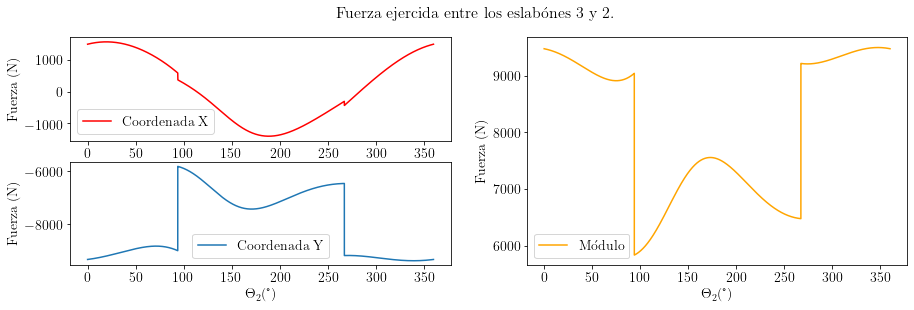

<Figure size 432x288 with 0 Axes>

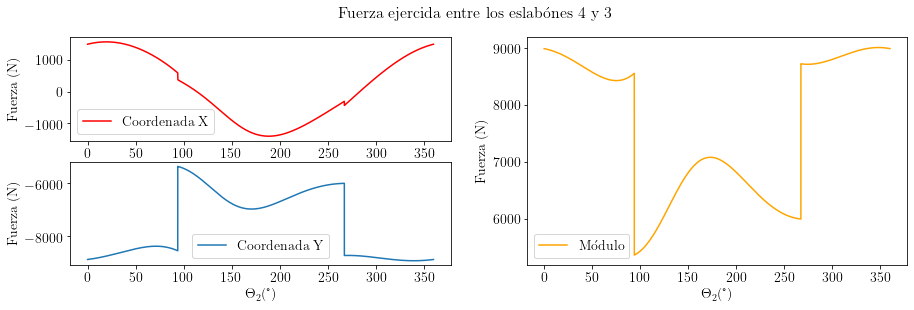

<Figure size 432x288 with 0 Axes>

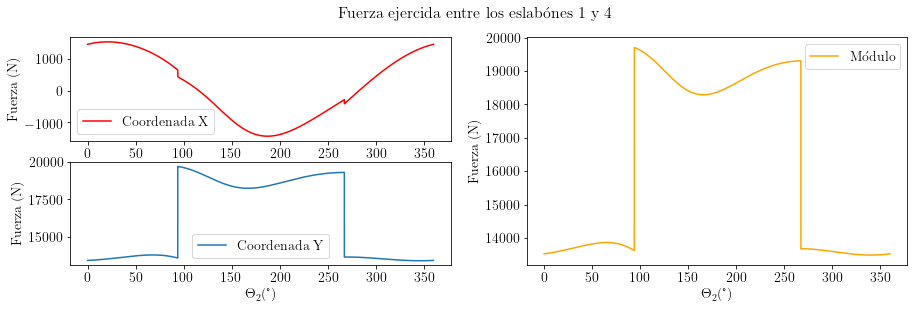

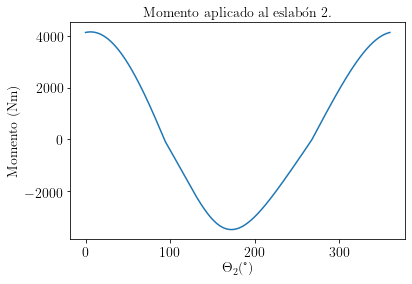

In [12]:
#ploteo
tit1='Fuerza ejercida entre los eslabónes '
tit2='Momento aplicado al eslabón 2.'
label1='Coordenada X'
label2='Coordenada Y'
label3='Módulo'
ylabel1='Fuerza (N)'
ylabel2='Momento (Nm)'
xlabel='$\Theta_2$(°)'

ploteo_3_graph('F12.png', theta2_lista, F12_X, F12_Y, F12, tit1+'1 y 2.', label1, label2, label3, xlabel, ylabel1, xlabel, ylabel1, xlabel, ylabel1)
ploteo_3_graph('F32.png', theta2_lista, F32_X, F32_Y, F32, tit1+'3 y 2.', label1, label2, label3, xlabel, ylabel1, xlabel, ylabel1, xlabel, ylabel1)
ploteo_3_graph('F43.png', theta2_lista, F43_X, F43_Y, F43, tit1+'4 y 3', label1, label2, label3, xlabel, ylabel1, xlabel, ylabel1, xlabel, ylabel1)
ploteo_3_graph('F14.png', theta2_lista, F14_X, F14_Y, F14, tit1+'1 y 4', label1, label2, label3, xlabel, ylabel1, xlabel, ylabel1, xlabel, ylabel1)
ploteo_1_graph('T12.png', theta2_lista, T12, tit2, xlabel, ylabel2)